<a href="https://colab.research.google.com/github/nkr9/Data-Analyst/blob/main/Wine_Case_study_(Dimensionality).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"D:\MTech IEDA-2\Data Analytics\Assignment Dimensionality\Wine.csv")

In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
df.Customer_Segment.unique()

array([1, 2, 3], dtype=int64)

In [ ]:
# Extract first 13 columns as X and the last column as Y
X = df.iloc[:, :13]
Y = df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Initialize LDA with 2 components
lda = LDA(n_components=2)

# Fit LDA on the training data and transform both training and test data
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

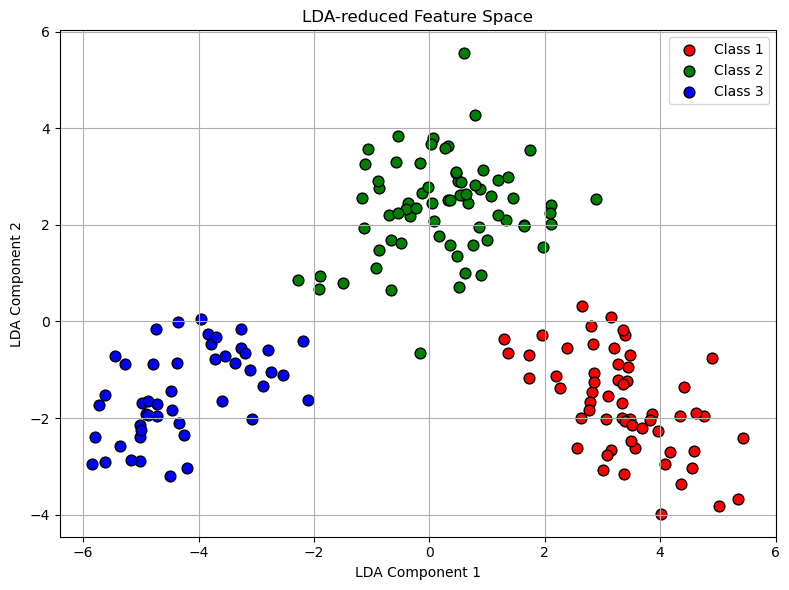

In [ ]:
# Optional: Combine components and labels into one array for plotting
X_combined_lda = np.vstack((X_train_lda, X_test_lda))
Y_combined = np.hstack((y_train, y_test))

# Plot with colors by class label
plt.figure(figsize=(8, 6))

for label, color in zip(np.unique(Y_combined), ['r', 'g', 'b']):
    plt.scatter(
        X_combined_lda[Y_combined == label, 0],
        X_combined_lda[Y_combined == label, 1],
        c=color,
        label=f'Class {label}',
        edgecolors='k',
        s=60
    )

plt.title('LDA-reduced Feature Space')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Apply Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

# 5. Apply Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_lda, y_train)

LogisticRegression()

In [ ]:
# 6. Classify the test data
Y_pred_lr = lr_model.predict(X_test_lda)

Logistic Regression:
Confusion Matrix:
 [[20  0  0]
 [ 1 23  0]
 [ 0  0 15]]


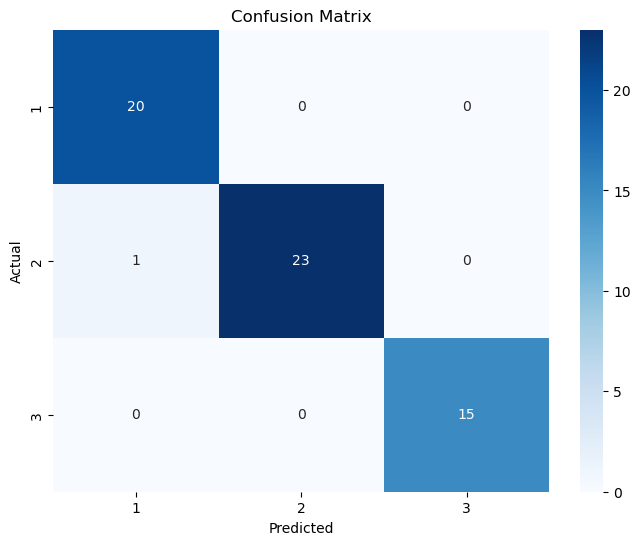

Confusion Matrix:
 None
Accuracy: 0.9830508474576272


In [ ]:
# 7. Evaluate with confusion matrix and accuracy
# Confusion Matrix
def confusion_matrix_report(y_true, y_pred, target_names):
    conf_matrix = metrics.confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Display confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title("Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
acc_lr = accuracy_score(y_test, Y_pred_lr)
print("Logistic Regression:")
print("Confusion Matrix:\n", confusion_matrix_report(y_test, Y_pred_lr,[1,2,3]))
print("Accuracy:", acc_lr)

## 8a. K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_lda, y_train)
Y_pred_knn = knn.predict(X_test_lda)
print("\nKNN Accuracy:", accuracy_score(y_test, Y_pred_knn))


KNN Accuracy: 0.9830508474576272


Confusion Matrix:
 [[20  0  0]
 [ 1 23  0]
 [ 0  0 15]]


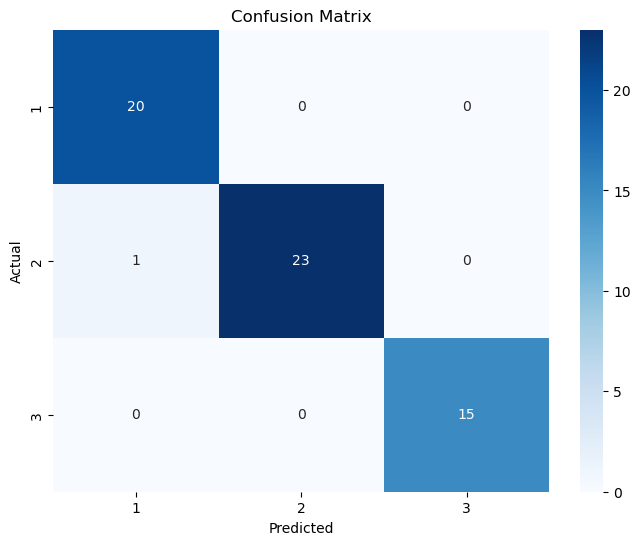

In [ ]:
confusion_matrix_report(y_test, Y_pred_knn,[1,2,3])

## 8b. Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_lda, y_train)
Y_pred_nb = nb.predict(X_test_lda)
print("Naive Bayes Accuracy:", accuracy_score(y_test, Y_pred_nb))

Naive Bayes Accuracy: 1.0


Confusion Matrix:
 [[20  0  0]
 [ 1 23  0]
 [ 0  0 15]]


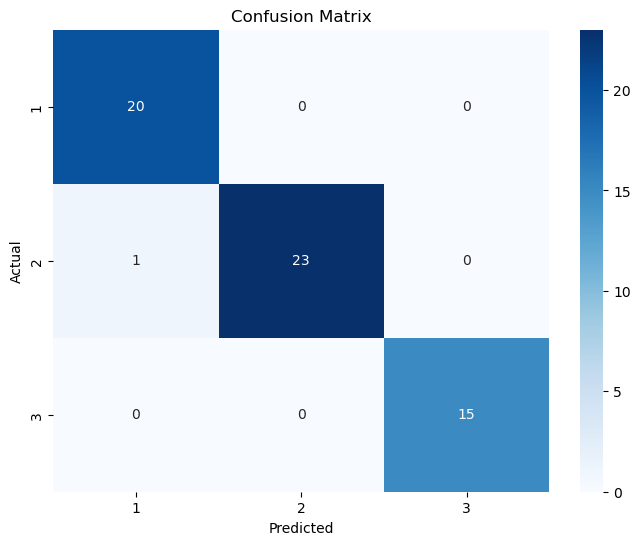

In [ ]:
confusion_matrix_report(y_test, Y_pred_knn,[1,2,3])

## 8c. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_lda, y_train)
Y_pred_dt = dt.predict(X_test_lda)
print("Decision Tree Accuracy:", accuracy_score(y_test, Y_pred_dt))

Decision Tree Accuracy: 0.9830508474576272


Confusion Matrix:
 [[20  0  0]
 [ 1 23  0]
 [ 0  0 15]]


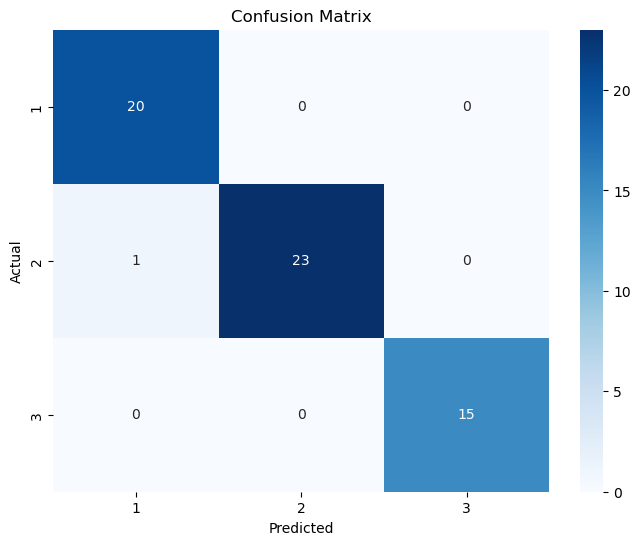

In [ ]:
confusion_matrix_report(y_test, Y_pred_dt,[1,2,3])

## 8d. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_lda, y_train)
Y_pred_rf = rf.predict(X_test_lda)
print("Random Forest Accuracy:", accuracy_score(y_test, Y_pred_rf))


Random Forest Accuracy: 0.9830508474576272


Confusion Matrix:
 [[20  0  0]
 [ 1 23  0]
 [ 0  0 15]]


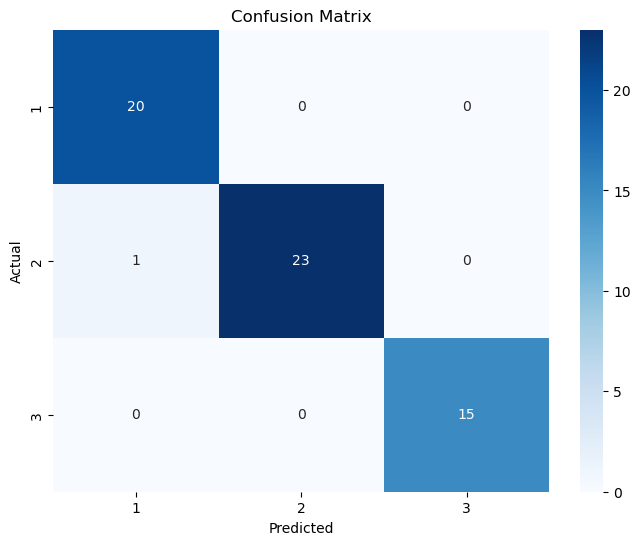

In [ ]:
confusion_matrix_report(y_test, Y_pred_rf,[1,2,3])

## 8e. Support Vector Classifier (SVC)

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_lda, y_train)
Y_pred_svc = svc.predict(X_test_lda)
print("SVC Accuracy:", accuracy_score(y_test, Y_pred_svc))

SVC Accuracy: 0.9830508474576272


Confusion Matrix:
 [[20  0  0]
 [ 1 23  0]
 [ 0  0 15]]


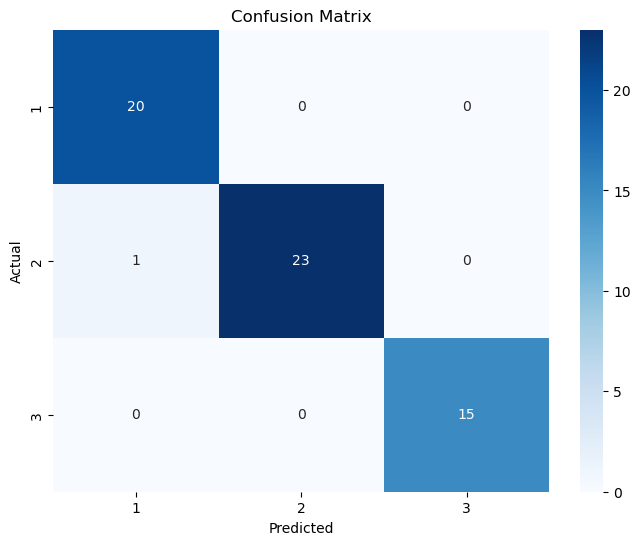

In [ ]:
confusion_matrix_report(y_test, Y_pred_svc,[1,2,3])